In [14]:
!pip install torch torchvision

In [15]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T
import cv2
import numpy as np
from google.colab import files

In [16]:
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [46]:
print("Please upload an image for detection: ")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")
transform = T.Compose([
    T.ToTensor()
])
image_tensor = transform(image)

Please upload an image for detection: 


Saving cat_dog.webp to cat_dog (2).webp


In [47]:
with torch.no_grad():
  predictions = model([image_tensor])

In [48]:
predictions

[{'boxes': tensor([[277.6539,  52.4113, 773.6136, 553.8322],
          [ 28.4003, 256.2215, 278.5719, 546.0276],
          [ 24.1847, 268.2622, 272.8278, 546.1556],
          [282.2124,  48.7485, 770.6475, 561.2769],
          [277.2995,  60.3927, 769.9045, 559.0701],
          [ 15.8195, 289.2784, 285.7140, 547.8398]]),
  'labels': tensor([18, 17, 18, 23, 20, 20]),
  'scores': tensor([0.9456, 0.9412, 0.4876, 0.2804, 0.2217, 0.0561])}]

In [49]:
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']
image_np = np.array(image)
confidence_threshold = 0.5

In [50]:
for i,box in enumerate(boxes):
  if scores[i] > confidence_threshold:
    x1,y1,x2,y2 = map(int, box)
    label = labels[i].item()
    score = scores[i].item()
    cv2.rectangle(image_np, (x1,y1), (x2,y2), (0, 255, 0), 2)
    text = f"Class: {label}, Score: {score: .2f}"
    cv2.putText(image_np, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

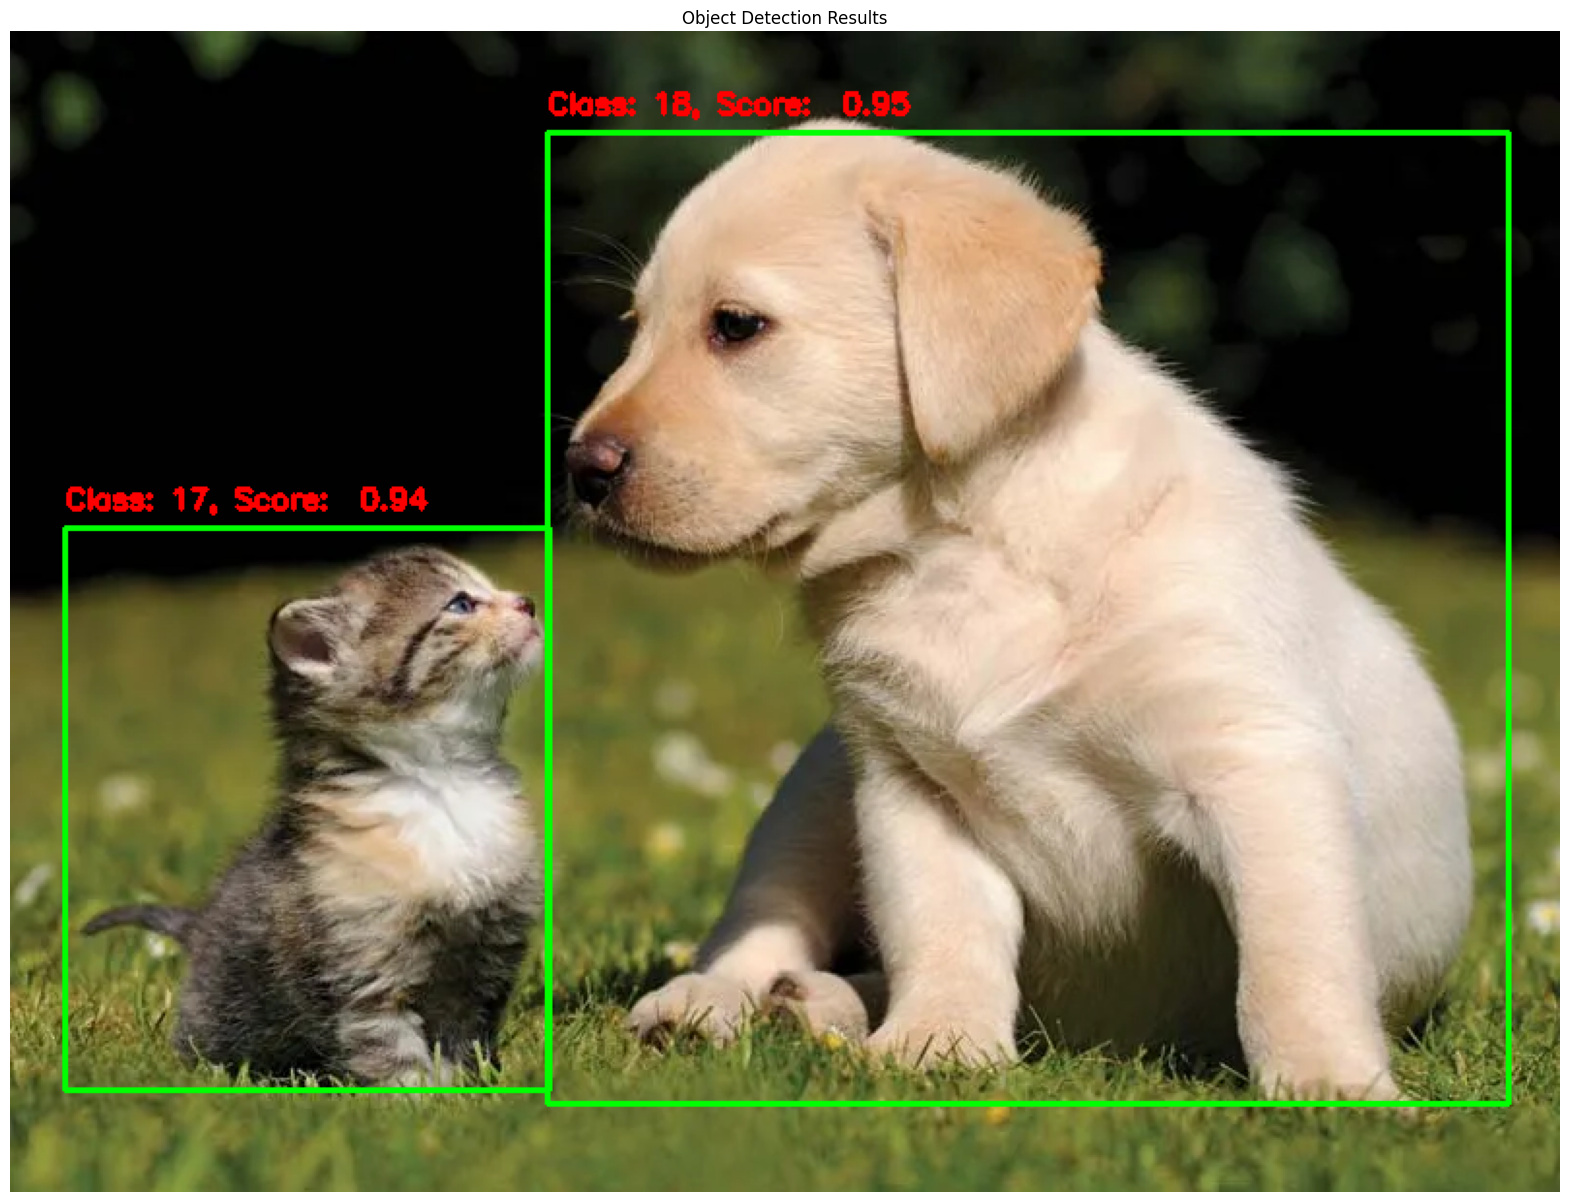

In [51]:
plt.figure(figsize = (20,20))
plt.imshow(image_np)
plt.axis("off")
plt.title("Object Detection Results")
plt.show()